#  K Nearest Neighbours (KNN) Classification


## 1. Analyse your Data

* import the libraries that have the tools that we need

In [1]:
import numpy as np
import pandas as pd

* Load data from file

In [2]:
iris_dataset = pd.read_csv("./data/iris.csv")



* show the first 5 rows of our dataset

In [3]:
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,149.000000,150.000000,150.000000,150.000000
mean,5.843333,3.047651,3.758667,1.198667,1.000000
std,0.828066,0.428004,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


* we are missing a value for SepalWidthCm
* a quick way to fill missing value is using the next bit of code


In [9]:
iris_dataset=iris_dataset.fillna(iris_dataset.mean())


In [10]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 2. Define the features X and the target y

#### <font color='red'>We only take the first two features:</font>

* this will give us the option to print the data in a 2D plot and understand the effect of choosing a value for K in KNN

In [11]:
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm']]
X.shape

(150, 2)

In [12]:
y = iris_dataset['Species']
y.shape



(150,)

Text(0, 0.5, 'SepalWidthCm')

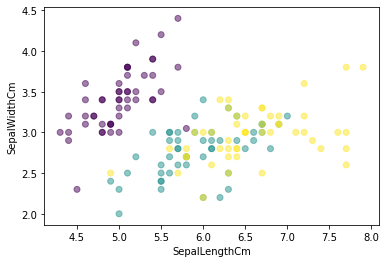

In [13]:
import matplotlib.pyplot as plt
plt.scatter( x=iris_dataset['SepalLengthCm'],y=iris_dataset['SepalWidthCm'], c=iris_dataset['Species'], alpha = 0.5)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')



##### Try to change the value of K here below:

In [14]:
n_neighbors = [1, 150, 3]

todays k is: 1
todays k is: 150
todays k is: 3


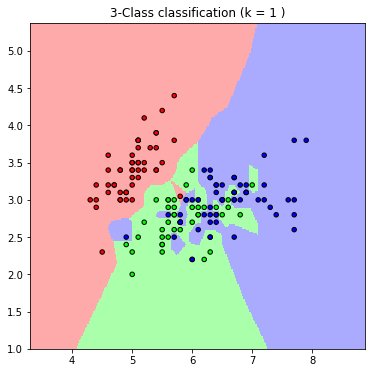

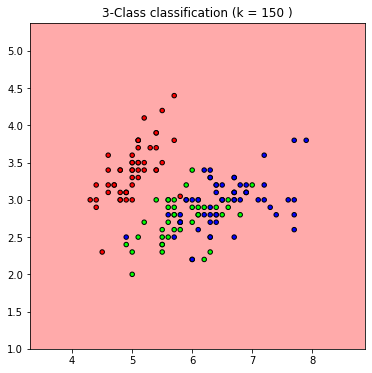

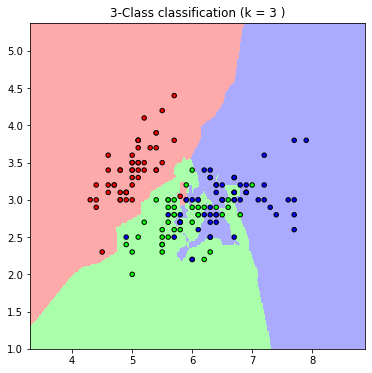

In [15]:
# the following code is only for representation and explaining the theory behind KNN
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

for k in n_neighbors:
    print('todays k is: %s' % k)
    
    knn=KNeighborsClassifier(n_neighbors = k)
    
    # we create an instance of Neighbours Classifier and fit the data.
    knn.fit(X, y)
    
    X = np.array(X)
    y = np.array(y)
    
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i )" % (k))

plt.show() # this line should fix if % matplotlib inline does not work

## 2. Define the features X and the target y

### <font color='red'>Back to our orginal dataset with 4 features:</font>



In [ ]:
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.shape

In [ ]:
y = iris_dataset['Species']
y.shape

## 3. Divide the data into 2 splits: training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) 

In [ ]:
print (X_train.shape)
print (X_test.shape)

In [ ]:
print (y_train.shape)
print (y_test.shape)

### 4. Create the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

* let's try k = 1 and we will come back and change it

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

### 5. Train the model

In [ ]:
# fit the data
knn.fit(X_train, y_train)

### 6. Evaluate the model

in order to choose a value of K we need a metric that tell us if one k is better than another.

![sepal_petal](data/overfitting.png)

* starting from the left: underfitting - good - overfitting 

In [ ]:
# training accuracy
knn.score(X_train,y_train)

In [ ]:
# testing accuracy
knn.score(X_test, y_test)

##### the graph below shows how to understand the score accuracy from the train data and test data vs model complexity

![sepal_petal](data/overfitting2.png)

* k = 1 gives us a perfect model for training but there is a trade-off for our model complexity

### 7. Tune the parameters of the model to increase the performance

### <font color='red'>Now we can try a different value of K and see what will change</font>


### 8. Make prediction

* I manually changed the target values in the csv file so 0 is Setosa, 1 is Versicolor and 2 is Virginica 

In [ ]:
flower = np.array([[5, 2.9, 1, 0.2],[2,3,4,6]])
flower.shape

In [ ]:
knn.predict(flower)

# EXTRA outliers

In [ ]:
iris_dataset.describe()

* pretending that we updated our dataset with 4 data that unfortunately have been collected with mistakes


In [ ]:
import numpy as np
iris_dataset.loc[150] = [5,4,1,0.5,2]
iris_dataset.loc[151] = [5,3,1,0.4,2]
iris_dataset.loc[152] = [5,3.5,0.8,0.5,2]
iris_dataset.loc[153] = [6,4.8,1,0.05,2]

In [ ]:
iris_dataset.tail()

In [ ]:
pd.plotting.scatter_matrix(iris_dataset, c=iris_dataset['Species'], figsize=(15, 15))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], iris_dataset['Species'], random_state=0)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

In [ ]:
# training accuracy
knn2.score(X_train,y_train)

In [ ]:
# testing accuracy
knn2.score(X_test, y_test)

notice that by adding only 4 wrongly collected data the accuracy dropped almost 10%